 # PART TWO:
 
## Coding : Implementation of MCDNN

### MCDNN Architecture

![architecture](https://user-images.githubusercontent.com/35916017/72090710-8bd76600-3349-11ea-985f-c28075c59f60.png)

 
 ##### For more understing please refer to the paper and this youtube video.
 
#### This notebook consist of four parts.
    Part 0: Downloading the dataset
    Part 1: Kddcup99 data cleaning and processing
    Part 2: Building MCDNN model
    Part 3: Training,Saving and Testing the model
    Part 4: Applying classification metrics


### Steps
![procedure](https://user-images.githubusercontent.com/35916017/72092201-cee70880-334c-11ea-8cd2-f9010958e122.png)



### Tools used

    Python
    Tensorflow

 ## Importing the dependencies

In [1]:
import pandas as pd
import io
import tensorflow.keras
import requests
import numpy as np
import os

### Part 0:  Downloading the kdd99 dataset

In [5]:
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.utils import get_file

Dataset = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')    

Using TensorFlow backend.


### Reading the dataset with pandas library

In [6]:
DataFrame = pd.read_csv(Dataset)

### Displaying the sample of our dataset

The KDDCUP dataset has more than 4 million records, the cell below displays 250 samples of them for better understanding of the data/

In [7]:
DataFrame.sample(250)

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
280889,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.
162521,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.
132876,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.
40949,1,tcp,smtp,SF,888,481,0,0,0,0,...,10,0.04,0.01,0.00,0.00,0.00,0.0,0.00,0.0,normal.
304646,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.
93817,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.
413655,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.
115500,0,tcp,private,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune.
359023,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,neptune.
315990,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf.


### Description of each future column adding  it the  to our created DataFrame

##### Since our dataset has no columns, the cell below adds the columns (feauture names).
 'duration','protocol_type','service','flag','src_bytes',
    'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate',
    'srv_rerror_rate','same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','outcome'

In [8]:
DataFrame.columns = [ 'duration','protocol_type','service','flag','src_bytes',
    'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate',
    'srv_rerror_rate','same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','label']

In [9]:
# Displaying the sample of DataFrame with added features
DataFrame.sample(250)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
331298,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.
183852,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.
272702,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.
242410,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.
353996,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune.
27143,0,udp,domain_u,SF,45,115,0,0,0,0,...,243,0.95,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal.
127714,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune.
176601,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.
276419,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.
277080,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.


In [10]:
# Shape of our DataFrame

DataFrame.shape

(494020, 42)

##### From above we have seen that kdd99 has 43 features , continuos values, 3 categorical and 40 numerical feautures

protocol_type, service, flag



###  Part 1: Data preprocessing

#### Feature Encoding part

In [11]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(DataFrame):
    print()
    cols = DataFrame.columns.values
    total = float(len(DataFrame))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
            

In [12]:
df = DataFrame

In [13]:
# Analyze KDD-99

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

analyze(df)

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
  


494020 rows
** duration:2495 (0%)
** protocol_type:[icmp:57.41%,tcp:38.47%,udp:4.12%]
** service:[ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,imap4:0.02%,gopher:0.02%,domain:0.02%,discard:0.02%,iso_tsap:0.02%,systat:0.02%,shell:0.02%,echo:0.02%,rje:0.02%,whois:0.02%,sql_net:0.02%,printer:0.02%,courier:0.02%,nntp:0.02%,sunrpc:0.02%,netbios_ssn:0.02%,mtp:0.02%,uucp:0.02%,vmnet:0.02%,uucp_path:0.02%,klogin:0.02%,bgp:0.02%,supdup:0.02%,nnsp:0.02%,ssh:0.02%,login:0.02%,hostnames:0.02%,efs:0.02%,daytime:0.02%,link:0.02%,netbios_ns:0.02%,pop_2:0.02%,ldap:0.02%,netbios_dgm:0.02%,http_443:0.02%,exec:0.02%,kshell:0.02%,name:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,tftp_u:0.0%,red_i:0.0%,pm_dump:0.0%]
** flag:[SF:76.6%,S0:17.61%,REJ:5.44%,RSTR:0.18%,RSTO:0.12%,SH:0.02%,S

** dst_host_rerror_rate:101 (0%)
** dst_host_srv_rerror_rate:101 (0%)
** label:[smurf.:56.84%,neptune.:21.7%,normal.:19.69%,back.:0.45%,satan.:0.32%,ipsweep.:0.25%,portsweep.:0.21%,warezclient.:0.21%,teardrop.:0.2%,pod.:0.05%,nmap.:0.05%,guess_passwd.:0.01%,buffer_overflow.:0.01%,land.:0.0%,warezmaster.:0.0%,imap.:0.0%,rootkit.:0.0%,loadmodule.:0.0%,ftp_write.:0.0%,multihop.:0.0%,phf.:0.0%,perl.:0.0%,spy.:0.0%]


In [14]:
# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

In [16]:
# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = df.columns.drop('label')
x = df[x_columns].values
dummies = pd.get_dummies(df['label']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [17]:
df.shape

(494020, 121)

In [18]:
x.shape

(494020, 120)

In [19]:
y.shape

(494020, 23)

#### Creating a test/train split.  25% test

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [21]:
x_test.shape[1]

120

### Part 3: Building and Training the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam')
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 370515 samples, validate on 123505 samples
Epoch 1/1000
370515/370515 - 27s - loss: 0.1207 - acc: 0.9695 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 2/1000
370515/370515 - 27s - loss: 0.0355 - acc: 0.9898 - val_loss: 0.0299 - val_acc: 0.9909
Epoch 3/1000
370515/370515 - 26s - loss: 0.0324 - acc: 0.9916 - val_loss: 0.0269 - val_acc: 0.9941
Epoch 4/1000
370515/370515 - 24s - loss: 0.0284 - acc: 0.9940 - val_loss: 0.0384 - val_acc: 0.9934
Epoch 5/1000
370515/370515 - 23s - loss: 0.0261 - acc: 0.9945 - val_loss: 0.0236 - val_acc: 0.9952
Epoch 6/1000
370515/370515 - 22s - loss: 0.0237 - acc: 0.9951 - val_loss: 0.0293 - val_acc: 0.9956
Epoch 7/1000
370515/370515 - 23s - loss: 0.0267 - acc: 0.9953 - val_loss: 0.0230 - val_acc: 0.9943
Epoch 8/1000
370515

In [29]:
# Saving our trained model

In [30]:
model.save("MCDNN.h5")

In [ ]:
# Loading our saved model 

In [31]:
from tensorflow.keras.models import load_model
model = load_model('MCDNN.h5')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1210      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_4 (Dense)              (None, 23)                46        
Total params: 2,327
Trainable params: 2,327
Non-trainable params: 0
_________________________________________________________________


In [32]:
# checking the model metrics
model.metrics_names

['loss', 'acc']

In [33]:
# Evaluating the loading model
model.evaluate(x=x_test,y=y_test)

123505/123505 [==============================] - 3s 22us/sample - loss: 0.0251 - acc: 0.9936


[0.025144921505034397, 0.9935711]

In [34]:
### Part 4: Model Testing

y_score = model.predict(x_test)

In [ ]:
# Displaying the valuation metrics i.e ROC curve

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


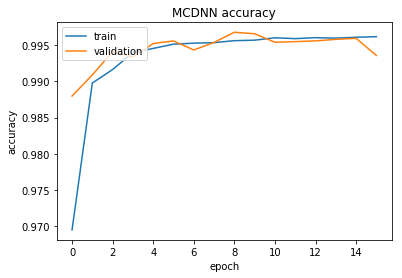

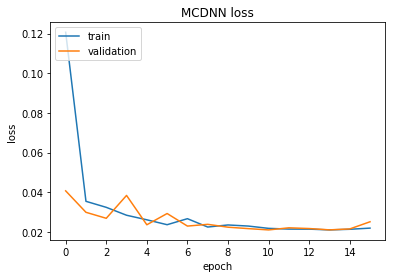

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MCDNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MCDNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [71]:
pwd

'/home/desire/Documents/SMA/Information Security/Datasets/firstmodel'

/home/desire/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


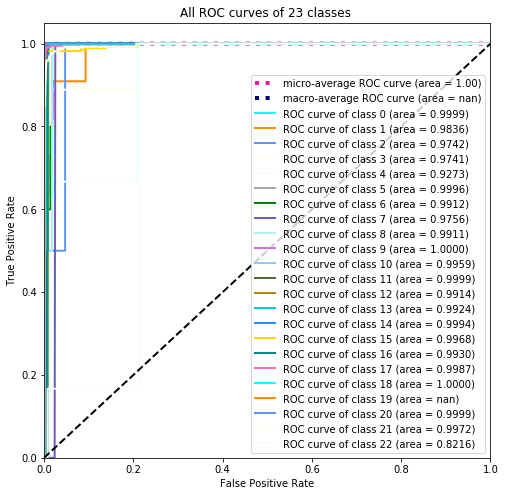

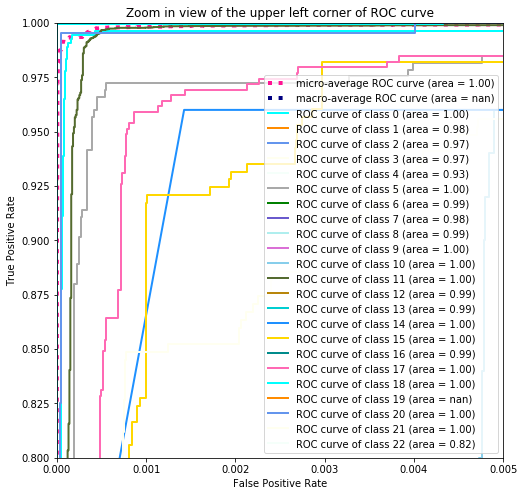

In [38]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 23
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,8))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','ivory','MintCream','DarkGrey','Green', 'SlateBlue','PaleTurquoise','Orchid','SkyBlue','DarkOliveGreen','DarkGoldenRod','DarkTurquoise','DodgerBlue','Gold','DarkCyan','HotPink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All ROC curves of 23 classes ')
plt.legend(loc="lower right")
plt.savefig('all_roc.png')

plt.show()


# Zoom in view of the upper left corner.
plt.figure(2,figsize=(8,8))
plt.xlim(0, 0.005)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','ivory','MintCream','DarkGrey','Green', 'SlateBlue','PaleTurquoise','Orchid','SkyBlue','DarkOliveGreen','DarkGoldenRod','DarkTurquoise','DodgerBlue','Gold','DarkCyan','HotPink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zoom in view of the upper left corner of ROC curve')
plt.legend(loc="lower right")
plt.savefig('zoomed_roc.png')
#plt.show()

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [44]:
 y_pred = model.predict(x_test)

In [47]:
y_pred.shape

(123505, 23)

In [45]:
 pred = np.argmax(y_pred,axis=1) # raw probabilities to chosen class (highest probability)

In [46]:
pred.shape

(123505,)

In [48]:
y_compare = np.argmax(y_test,axis=1)

In [49]:
y_compare.shape

(123505,)

In [51]:
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.993571110481357


In [52]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

pred = np.argmax(y_pred,axis=1) # raw probabilities to chosen class (highest probability)

Numpy array of predictions


array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.9997, 0.    , 0.    , 0.    , 0.    ,
        0.0001, 0.    , 0.    , 0.    , 0.    , 0.0002, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.  

As percent probability
[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
 99.9991  0.      0.0009  0.      0.    ]
Log loss score: 0.02447035875416126


### Classification report

In [56]:
from sklearn.metrics import classification_report

predictions_test = model.predict_classes(x_test)

In [57]:
predictions_train = model.predict_classes(x_train)

In [63]:
y_test=np.argmax(y_test, axis=1)

In [58]:
y_train=np.argmax(y_train, axis=1)

In [60]:
data = df.groupby('label')['label'].count()

In [66]:
Training_Pred = (classification_report(y_train,predictions_train))

In [64]:
Testing_Pred = (classification_report(y_test,predictions_test))

In [67]:
print(Training_Pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1663
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00         9
           5       0.75      0.94      0.84       922
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         5
           9       1.00      1.00      1.00     80535
          10       0.00      0.00      0.00       181
          11       0.99      1.00      1.00     72992
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00       214
          15       0.18      0.07      0.10       762
          16       0.00      0.00      0.00         8
          17       0.53    

In [68]:
print(Testing_Pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       540
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3
           5       0.83      0.94      0.88       325
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     26666
          10       0.00      0.00      0.00        50
          11       0.99      1.00      0.99     24285
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00        50
          15       0.21      0.06      0.10       278
          16       0.00      0.00      0.00         2
          17       0.51    